## FROM HERE - doing based recom bpop

In [88]:
#%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election)
from gerrychain.proposals import recom
from gerrychain.metrics import mean_median
from bvap_recom import bvap_biased_recom
from functools import partial
import pandas as pd
#import matplotlib.pyplot as plt; plt.style.use('ggplot')
import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [47]:
graph = Graph.from_file("data/PA_VTD/PA_VTD.shp")

In [48]:
for node in graph.nodes:
    total_pop = graph.nodes[node]['TOT_POP']
    bvap = graph.nodes[node]['BLACK_POP']
    graph.nodes[node]['nBVAP'] = total_pop - bvap
    graph.nodes[node]['population'] = total_pop

In [50]:
# from https://gerrychain.readthedocs.io/en/latest/user/recom.html
my_updaters = {
    "population": updaters.Tally("TOT_POP", alias="population"),
    "cut_edges": updaters.cut_edges,
}
elections = [
    Election("BLACK_POP", {"BLACK_POP": "BLACK_POP", "nBVAP": "nBVAP"})
]
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

In [51]:
import bvap_recom
from importlib import reload
bvap_recom = reload(bvap_recom)

initial_partition = GeographicPartition(graph, assignment="2011_PLA_1", updaters=my_updaters)
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)
pop_tolerance = 0.02

proposal = partial(bvap_recom.bvap_biased_recom,
                   pop_col="TOT_POP",
                   bvap_col="BLACK_POP",
                   pop_target=ideal_population,
                   epsilon=pop_tolerance,
                   node_repeats=2,
                   target_districts=[16, 17],
                   p_target=0.25
                  )

compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, pop_tolerance)

In [52]:
chain = MarkovChain(
    proposal=proposal,
    constraints=[
        pop_constraint,
        compactness_bound
    ],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=10000
)

In [45]:
#bvap_16 = []
#bvap_17 = []
#data=[]
#for run in range(1):
#    print('--- Run', run, '---')
#    for idx, part in enumerate(chain.with_progress_bar()):
##        if idx % 25 == 0: print(idx)
#        bvaps = sorted(part['BLACK_POP'].percents('BLACK_POP'))
#        data=pd.DataFrame(sorted(part['BLACK_POP'].percents('BLACK_POP')))
#        bvap_16.append(bvaps[16])
#        bvap_17.append(bvaps[17])

--- Run 0 ---


0
25


KeyboardInterrupt: 

In [53]:
bvap_16 = []
bvap_17 = []
rows=[]
for part in chain.with_progress_bar():
    bvaps = sorted(part['BLACK_POP'].percents('BLACK_POP'))
    rows.append(sorted(part['BLACK_POP'].percents('BLACK_POP')))
    bvap_16.append(bvaps[16])
    bvap_17.append(bvaps[17])

In [75]:
data = pd.DataFrame(rows)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.020225,0.023413,0.028255,0.030538,0.031053,0.033312,0.036756,0.040446,0.044869,0.045266,0.048001,0.051376,0.056692,0.073367,0.171134,0.214749,0.342255,0.589328
1,0.020225,0.023413,0.028255,0.030538,0.031053,0.033312,0.038021,0.040446,0.044869,0.045266,0.048001,0.049856,0.056692,0.073367,0.171134,0.214749,0.342255,0.589328
2,0.020225,0.023413,0.028255,0.030538,0.031053,0.033312,0.037208,0.040446,0.044869,0.045266,0.048001,0.050685,0.056692,0.073367,0.171134,0.214749,0.342255,0.589328
3,0.020225,0.023413,0.028255,0.030538,0.031053,0.033312,0.037208,0.040446,0.044869,0.045266,0.048001,0.050685,0.056692,0.073367,0.154146,0.214749,0.359469,0.589328
4,0.020225,0.023413,0.028255,0.030538,0.031053,0.033312,0.037208,0.040446,0.044869,0.045266,0.048001,0.050685,0.056692,0.073367,0.134479,0.214749,0.377659,0.589328
5,0.022572,0.023413,0.028255,0.028886,0.030538,0.033312,0.037208,0.040446,0.044869,0.045266,0.048001,0.050685,0.056692,0.073367,0.134479,0.214749,0.377659,0.589328
6,0.022572,0.023413,0.028255,0.028886,0.033312,0.037208,0.040446,0.043286,0.044869,0.045266,0.048001,0.050685,0.056692,0.073367,0.134479,0.204066,0.377659,0.589328
7,0.019971,0.023413,0.028255,0.031265,0.033312,0.037208,0.040446,0.043286,0.044869,0.045266,0.048001,0.050685,0.056692,0.073367,0.134479,0.204066,0.377659,0.589328
8,0.019971,0.023413,0.028255,0.031265,0.033312,0.037208,0.040446,0.043286,0.044869,0.045266,0.049837,0.050685,0.054708,0.073367,0.134479,0.204066,0.377659,0.589328
9,0.019971,0.023413,0.028255,0.031265,0.034967,0.037208,0.040446,0.043286,0.044869,0.045266,0.049837,0.050685,0.054708,0.073367,0.130943,0.204066,0.377659,0.589328


In [96]:
for i in range(10000):
    print(bvap_16[i]-data[16][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [55]:
bvap_16

[0.34225497032262453,
 0.34225497032262453,
 0.34225497032262453,
 0.35946926914541605,
 0.3776594169483495,
 0.3776594169483495,
 0.3776594169483495,
 0.3776594169483495,
 0.3776594169483495,
 0.3776594169483495,
 0.3776594169483495,
 0.4534634260608242,
 0.4534634260608242,
 0.4534634260608242,
 0.4122501740081535,
 0.4122501740081535,
 0.304523371057627,
 0.304523371057627,
 0.40876147642107447,
 0.40876147642107447,
 0.40876147642107447,
 0.4217420251464653,
 0.4122717707582968,
 0.4122717707582968,
 0.4122717707582968,
 0.4122717707582968,
 0.4122717707582968,
 0.4122717707582968,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069737648305,
 0.43016069

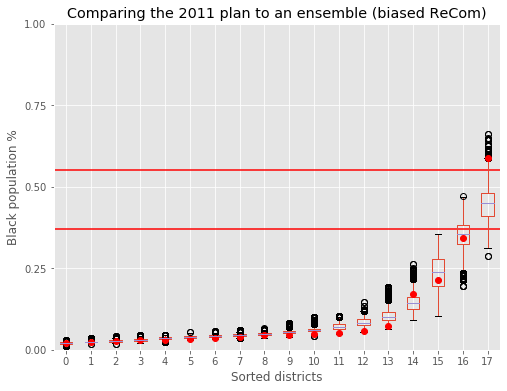

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))

# Draw 50% line
ax.axhline(0.37, color="red")
ax.axhline(0.55, color="red")

# Draw boxplot
data.boxplot(ax=ax, positions=range(len(data.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row)
plt.plot(data.iloc[0], "ro")

# Annotate
ax.set_title("Comparing the 2011 plan to an ensemble (biased ReCom)")
ax.set_ylabel("Black population %")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

fig.savefig('PA_bpop_boxplot_biased_recom.png',dpi=300, bbox_inches='tight')
plt.show()

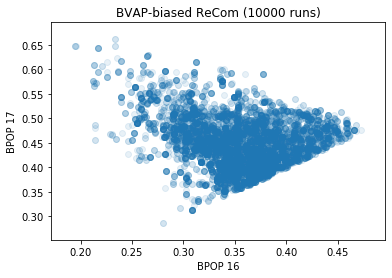

In [58]:
plt.scatter(bvap_16, bvap_17, alpha=0.1)
plt.xlabel('BPOP 16')
plt.ylabel('BPOP 17')
plt.title(f'BVAP-biased ReCom ({len(bvap_16)} runs)')
#plt.savefig('results/bvap_biased_recom/bvap_86_vs_87.png', dpi=300)
plt.show()

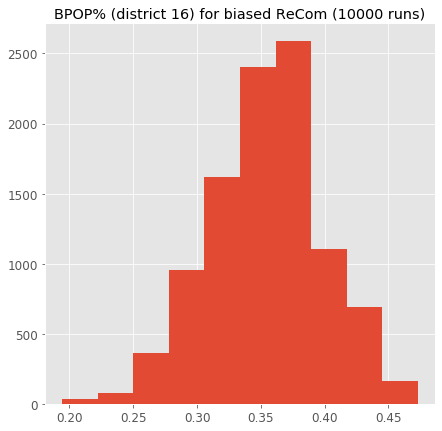

In [105]:
fig=plt.figure(figsize=(7,7))
plt.hist(bvap_16)
plt.title(f'BPOP% (district 16) for biased ReCom ({len(bvap_16)} runs)')
plt.yticks(fontsize =12)
plt.xticks(fontsize =12)
fig.savefig('PA_histogram_biased ReCom.png',dpi=300, bbox_inches='tight')

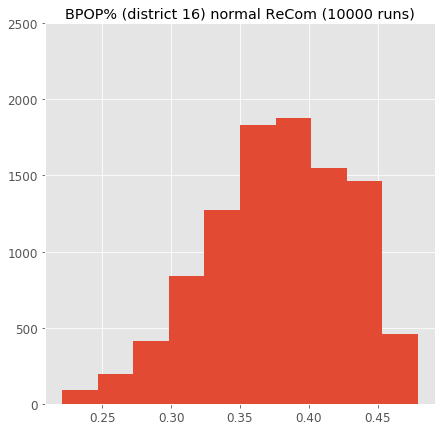

In [97]:
fig=plt.figure(figsize=(7,7))
plt.hist(data2[16])
plt.ylim([0,2500])
plt.title(f'BPOP% (district 16) normal ReCom ({len(bvap_16)} runs)')
plt.yticks(fontsize =12)
plt.xticks(fontsize =12)
fig.savefig('PA_histogram_normal ReCom.png',dpi=300, bbox_inches='tight')

## FROM here – doing normal recom bpop

In [62]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election)
from gerrychain.proposals import recom
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
import geopandas as gpd
from gerrychain.tree import recursive_tree_part
import tqdm
from random import random
from gerrychain.metrics import efficiency_gap, mean_median

from gerrychain.updaters import cut_edges

In [60]:
shape_path = "data/PA_VTD/PA_VTD.shp"

graph = Graph.from_file(shape_path, reproject = False)

graph.to_json("pa_json.json")

jgraph = Graph.from_json("pa_json.json")

In [63]:
df = gpd.read_file(shape_path)

In [67]:
df["nB_POP"] = df["TOT_POP"].astype("int") - df["BLACK_POP"].astype("int")
jgraph.join(df, columns=["nB_POP"])

In [68]:
elections = [
    Election("SEN10", {"Democratic": "SEN10D", "Republican": "SEN10R"}),
    Election("SEN12", {"Democratic": "USS12D", "Republican": "USS12R"}),
    Election("SEN16", {"Democratic": "T16SEND", "Republican": "T16SENR"}),
    Election("PRES12", {"Democratic": "PRES12D", "Republican": "PRES12R"}),
    Election("PRES16", {"Democratic": "T16PRESD", "Republican": "T16PRESR"})
]

In [69]:
# Population updater, for computing how close to equality the district
# populations are. "TOT_POP" is the population column from our shapefile.
my_updaters = {"population": updaters.Tally("TOT_POP", alias="population"),
              "BLACK_POP":Election("BLACK_POP",{"BLACK_POP":"BLACK_POP","nB_POP":"nB_POP"})}

# Election updaters, for computing election results using the vote totals
# from our shapefile.
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

In [70]:
initial_partition = GeographicPartition(jgraph, assignment="2011_PLA_1", updaters=my_updaters)

In [71]:
# The ReCom proposal needs to know the ideal population for the districts so that
# we can improve speed by bailing early on unbalanced partitions.

ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

# We use functools.partial to bind the extra parameters (pop_col, pop_target, epsilon, node_repeats)
# of the recom proposal.
proposal = partial(recom,
                   pop_col="TOT_POP",
                   pop_target=ideal_population,
                   epsilon=0.02,
                   node_repeats=2
                  )

In [72]:
compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, 0.02)

In [73]:
chain = MarkovChain(
    proposal=proposal,
    constraints=[
        pop_constraint,
        compactness_bound
    ],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=10000
)

In [76]:
data2 = pd.DataFrame(
    sorted(partition["BLACK_POP"].percents("BLACK_POP"))
    for partition in chain.with_progress_bar()
)

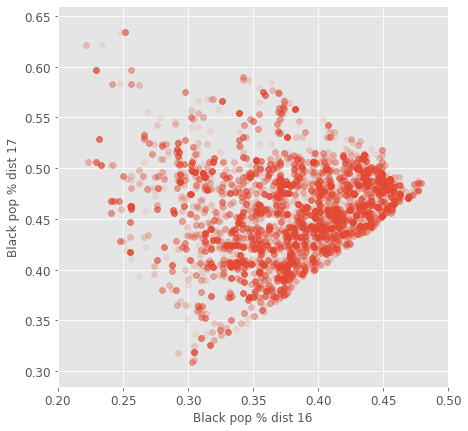

In [104]:
fig=plt.figure(figsize=(7,7))
plt.scatter(data2[16], data2[17], alpha=0.1)
plt.xlabel("Black pop % dist 16")
plt.ylabel("Black pop % dist 17")
plt.yticks(fontsize =12)
plt.xticks(fontsize =12)
fig.savefig('PA_bpop_16_17_normal_recom.png',dpi=300, bbox_inches='tight')

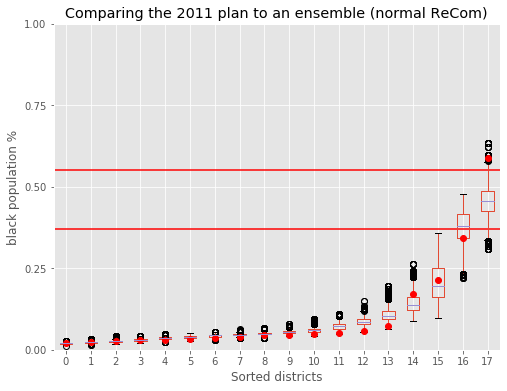

In [102]:
fig, ax = plt.subplots(figsize=(8, 6))

# Draw 50% line
ax.axhline(0.37, color="red")
ax.axhline(0.55, color="red")

# Draw boxplot
data2.boxplot(ax=ax, positions=range(len(data2.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row)
plt.plot(data2.iloc[0], "ro")

# Annotate
ax.set_title("Comparing the 2011 plan to an ensemble (normal ReCom)")
ax.set_ylabel("black population %")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

fig.savefig('PA_bpop_boxplot_normal_recom.png',dpi=300, bbox_inches='tight')
plt.show()